# Redução de Dimensionalidade usando AutoEncoders

In [1]:
# Importando as bibliotecas
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Lendo os dados
base = pd.read_csv('census.csv')

base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Separando os valores de X
x = base.iloc[:, 0:14].values
y = base.iloc[:, 14].values

print(x)

[[39 ' State-gov' 77516 ... 0 40 ' United-States']
 [50 ' Self-emp-not-inc' 83311 ... 0 13 ' United-States']
 [38 ' Private' 215646 ... 0 40 ' United-States']
 ...
 [58 ' Private' 151910 ... 0 40 ' United-States']
 [22 ' Private' 201490 ... 0 20 ' United-States']
 [52 ' Self-emp-inc' 287927 ... 0 40 ' United-States']]


In [4]:
# # Realizando o encoding das colunas categóricas
labelencoder_x = LabelEncoder()

x[:, 1] = labelencoder_x.fit_transform(x[:, 1])
x[:, 3] = labelencoder_x.fit_transform(x[:, 3])
x[:, 5] = labelencoder_x.fit_transform(x[:, 5])
x[:, 6] = labelencoder_x.fit_transform(x[:, 6])
x[:, 7] = labelencoder_x.fit_transform(x[:, 7])
x[:, 8] = labelencoder_x.fit_transform(x[:, 8])
x[:, 9] = labelencoder_x.fit_transform(x[:, 9])
x[:, 13] = labelencoder_x.fit_transform(x[:, 13])

# OneHot Encoding
onehotencoder = OneHotEncoder(categorical_features = [1,3,5,6,7,8,9,13])
x = onehotencoder.fit_transform(x).toarray()


# Standardization
scaler = StandardScaler()
x = scaler.fit_transform(x)

print(x)

[[-0.2444502  -0.17429511 -0.26209736 ...  0.1484529  -0.21665953
  -0.03542945]
 [-0.2444502  -0.17429511 -0.26209736 ... -0.14592048 -0.21665953
  -2.22215312]
 [-0.2444502  -0.17429511 -0.26209736 ... -0.14592048 -0.21665953
  -0.03542945]
 ...
 [-0.2444502  -0.17429511 -0.26209736 ... -0.14592048 -0.21665953
  -0.03542945]
 [-0.2444502  -0.17429511 -0.26209736 ... -0.14592048 -0.21665953
  -1.65522476]
 [-0.2444502  -0.17429511 -0.26209736 ...  1.88842434 -0.21665953
  -0.03542945]]


In [5]:
# Separando os dados entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print(x_train.shape)
print(x_test.shape)

(24420, 108)
(8141, 108)


In [6]:
# Qual a dimensão que queremos obter?
n_dims = 10


# Criando o Modelo
i = Input(shape=(x_train.shape[1],))

# Layer 1 responsável por realizar o encoding (representação vetorial dos dados)
encoder_1 = Dense(32, activation='tanh')(i)

# Layer 2 responsável por realizar o tanh (representação vetorial dos dados)
encoder_2 = Dense(16, activation='tanh')(encoder_1)

# Layer final (dimensão desejada)
encoder_3 = Dense(n_dims, activation='relu')(encoder_2)

# Layer 1 responsável por realizar o decoding (reconstruir os dados para seu formato original)
decoder_1 = Dense(16, activation='tanh')(encoder_3)

# Layer 2 responsável por realizar o decoding (reconstruir os dados para seu formato original)
decoder_2 = Dense(32, activation='tanh')(decoder_1)

# Layer responsável por realizar o decoding (reconstruir os dados para seu formato original)
decoder_3 = Dense(x_train.shape[1], activation='relu')(decoder_2)

In [7]:
# Criando o objeto do modelo e Compilando
autoencoder = Model(i, decoder_3)
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')


# Treinando o modelo (identificando a sua capacidade de reconstruir os dados originais a partir dos dados reduzidos).
r = autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 24420 samples, validate on 8141 samples
Epoch 1/100
24420/24420 [==============================] - 1s 60us/sample - loss: 0.9491 - val_loss: 0.8636
Epoch 2/100
24420/24420 [==============================] - 1s 24us/sample - loss: 0.8645 - val_loss: 0.7989
Epoch 3/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.8025 - val_loss: 0.7435
Epoch 4/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.7515 - val_loss: 0.6986
Epoch 5/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.7098 - val_loss: 0.6617
Epoch 6/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.6752 - val_loss: 0.6313
Epoch 7/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.6467 - val_loss: 0.6058
Epoch 8/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.6227 - val_loss: 0.5835
Epoch 9/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.601

24420/24420 [==============================] - 1s 23us/sample - loss: 0.3531 - val_loss: 0.3406
Epoch 76/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.3523 - val_loss: 0.3399
Epoch 77/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.3515 - val_loss: 0.3391
Epoch 78/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.3509 - val_loss: 0.3390
Epoch 79/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.3503 - val_loss: 0.3387
Epoch 80/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.3500 - val_loss: 0.3378
Epoch 81/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.3493 - val_loss: 0.3380
Epoch 82/100
24420/24420 [==============================] - 1s 23us/sample - loss: 0.3488 - val_loss: 0.3368
Epoch 83/100
24420/24420 [==============================] - 1s 24us/sample - loss: 0.3481 - val_loss: 0.3377
Epoch 84/100
24420/24420 [======

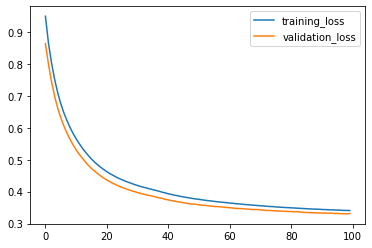

In [8]:
# Plotando a loss por iteração
plt.plot(r.history['loss'], label='training_loss')
plt.plot(r.history['val_loss'], label='validation_loss')
plt.legend()

In [9]:
# Após chegar num resultado interessante, podemos criar o encoder para reduzir a dimensionalidade do nosso dataset.
# Qual a dimensão que queremos obter?
n_dims = 10


# Criando o Modelo
i = Input(shape=(x_train.shape[1],))

# Layer 1 responsável por realizar o encoding (representação vetorial dos dados)
encoder_1 = Dense(32, activation='tanh')(i)

# Layer 2 responsável por realizar o tanh (representação vetorial dos dados)
encoder_2 = Dense(16, activation='tanh')(encoder_1)

# Layer final (dimensão desejada)
encoder_3 = Dense(n_dims, activation='relu')(encoder_2)

In [10]:
# Criando o objeto do modelo
encoder_model = Model(i, encoder_3)

# Reduzindo a dimensionalidade do nosso dataset
base_dim_reduzida = encoder_model.predict(x)

# Dimensão final da nossa base de dados: N x 10
print(base_dim_reduzida.shape)

(32561, 10)
